In [87]:
import netCDF4
import matplotlib.pyplot as plt
import lxml
import requests
import io
import lxml.etree


%matplotlib inline

catalog_url = 'http://opendap.tudelft.nl/thredds/catalog/data2/zandmotor/meteohydro/hydrodynamics/drifters/catalog.xml'
data_url = 'http://opendap.tudelft.nl/thredds/dodsC/'

url = 'http://opendap.tudelft.nl/thredds/dodsC/data2/zandmotor/meteohydro/hydrodynamics/drifters/flood_01_10_2014.nc'
url = 'http://opendap.tudelft.nl/thredds/dodsC/data2/zandmotor/meteohydro/hydrodynamics/drifters/flood_01_10_2014.nc'

In [95]:
resp = requests.get(catalog_url)
tree = lxml.etree.fromstring(resp.content)
dataset = tree.find('{http://www.unidata.ucar.edu/namespaces/thredds/InvCatalog/v1.0}dataset')
urls = []
for element in iter(dataset.iterchildren()):
    element
    if 'urlPath' in element.attrib:
        url = data_url + element.attrib['urlPath']
    else:
        lxml.etree.tostring(element)
    urls.append(url)
urls

['http://opendap.tudelft.nl/thredds/dodsC/data2/zandmotor/meteohydro/hydrodynamics/drifters/ebb_01_10_2014.nc',
 'http://opendap.tudelft.nl/thredds/dodsC/data2/zandmotor/meteohydro/hydrodynamics/drifters/flood_30_09_2014.nc',
 'http://opendap.tudelft.nl/thredds/dodsC/data2/zandmotor/meteohydro/hydrodynamics/drifters/flood_23_09_2014.nc',
 'http://opendap.tudelft.nl/thredds/dodsC/data2/zandmotor/meteohydro/hydrodynamics/drifters/flood_18_10_2014.nc',
 'http://opendap.tudelft.nl/thredds/dodsC/data2/zandmotor/meteohydro/hydrodynamics/drifters/flood_17_10_2014.nc',
 'http://opendap.tudelft.nl/thredds/dodsC/data2/zandmotor/meteohydro/hydrodynamics/drifters/flood_15_10_2014.nc',
 'http://opendap.tudelft.nl/thredds/dodsC/data2/zandmotor/meteohydro/hydrodynamics/drifters/flood_13_10_2014.nc',
 'http://opendap.tudelft.nl/thredds/dodsC/data2/zandmotor/meteohydro/hydrodynamics/drifters/flood_02_10_2014.nc',
 'http://opendap.tudelft.nl/thredds/dodsC/data2/zandmotor/meteohydro/hydrodynamics/drifter

/Users/baart_f/.virtualenvs/main/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.
/Users/baart_f/.virtualenvs/main/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.
/Users/baart_f/.virtualenvs/main/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """
/Users/baart_f/.virtualenvs/main/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


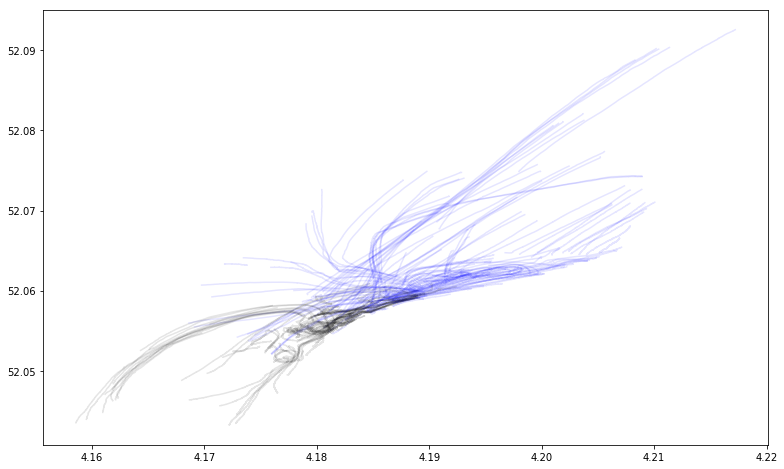

In [100]:
fig, ax = plt.subplots(figsize=(13, 8))
for url in urls:
    ds = netCDF4.Dataset(str(url))
    lat = ds.variables['lat'][:]
    lon = ds.variables['lon'][:]
    if 'eb' in url:
        ax.plot(lon, lat, 'k-', alpha=0.1);
    else:
        ax.plot(lon, lat, 'b-', alpha=0.1);

In [106]:
ds.variables['time'][:].shape

/Users/baart_f/.virtualenvs/main/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


(3989, 13)